#  mediapipeで取った特徴点を分析

In [35]:
import sys
from google.colab import drive
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv
import os
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csvデータ読み込み
train,test,validそれぞれ7感情の特徴点を記録

In [36]:
fp_train='/content/drive/MyDrive/data分析/Mediapipe/csvtraintotal.csv'
df_train=pd.read_csv(fp_train)
fp_test='/content/drive/MyDrive/data分析/Mediapipe/csvtesttotal.csv'
df_test=pd.read_csv(fp_test)
fp_valid='/content/drive/MyDrive/data分析/Mediapipe/csvvalidtotal.csv'
df_valid=pd.read_csv(fp_valid)

In [37]:
df_train

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,Unnamed: 0,correct
0,0.470799,0.682127,-0.080930,0.339680,0.500239,0.001424,0.296106,0.526307,0.013302,0.361964,0.573378,-0.044539,0.191371,0.194533,0.097439,0.212881,0.238277,0.052467,0.235472,0.285108,0.014390,0.385465,0.781734,-0.007592,0.357043,0.274428,-0.037246,0.340158,0.202853,-0.015436,0.321931,0.130519,0.006262,0.412151,0.113719,-0.008327,0.253681,0.442930,0.056188,0.192371,...,0.737290,-0.025478,0.434136,0.314108,-0.042840,0.398939,0.746655,-0.030840,0.393578,0.757806,-0.026364,0.351389,0.677704,-0.021752,0.173446,0.579080,0.323007,0.459225,0.599125,-0.099350,0.399182,0.731124,-0.006322,0.391899,0.733549,-0.009079,0.424361,0.611631,-0.070455,0.380985,0.606789,-0.037339,0.419343,0.605716,-0.069694,0.428503,0.269363,-0.045183,0,0
1,0.469567,0.799870,-0.017644,0.348688,0.513593,-0.045884,0.290292,0.530457,-0.030681,0.352485,0.633756,-0.053042,0.209036,0.094351,-0.139540,0.239477,0.182606,-0.157115,0.265887,0.273181,-0.170042,0.327009,0.827892,0.100199,0.425728,0.307515,-0.205852,0.416682,0.194925,-0.227324,0.406638,0.083548,-0.242068,0.529422,0.090397,-0.250223,0.250477,0.403172,-0.039577,0.157762,...,0.798798,0.062630,0.508284,0.366295,-0.177562,0.354303,0.805612,0.062696,0.345936,0.813267,0.070353,0.316791,0.738285,0.024206,0.072487,0.447892,0.333080,0.477093,0.723211,-0.088660,0.350487,0.789399,0.078221,0.343767,0.790928,0.078075,0.422094,0.713270,-0.049938,0.363159,0.677821,-0.022846,0.415244,0.704734,-0.056130,0.513777,0.319253,-0.206077,3,0
2,0.711111,0.717369,-0.049849,0.492522,0.549239,-0.050151,0.450243,0.587217,-0.045329,0.539467,0.635224,-0.070256,0.223377,0.272958,-0.083552,0.283708,0.326970,-0.109453,0.340850,0.387407,-0.131149,0.603942,0.857271,0.056888,0.490310,0.351051,-0.153234,0.437256,0.259501,-0.155545,0.385495,0.177831,-0.154630,0.488445,0.137941,-0.152786,0.367887,0.503332,-0.038149,0.294357,...,0.822683,0.029002,0.578697,0.367118,-0.129393,0.622796,0.834589,0.028758,0.616266,0.845286,0.035142,0.550873,0.747057,-0.012852,0.228344,0.659144,0.268810,0.688327,0.643454,-0.101639,0.612709,0.811374,0.041834,0.604680,0.816566,0.040922,0.633793,0.664174,-0.071061,0.566127,0.666339,-0.046193,0.624728,0.659804,-0.075197,0.565757,0.328598,-0.146556,4,0
3,0.483527,0.809326,-0.011760,0.344644,0.581638,-0.033273,0.295061,0.597420,-0.013657,0.360514,0.680113,-0.041067,0.189817,0.220668,-0.127457,0.215817,0.290792,-0.141683,0.238612,0.363065,-0.150872,0.378712,0.844660,0.111848,0.382644,0.402066,-0.192089,0.370748,0.305048,-0.214974,0.355163,0.208554,-0.232295,0.464029,0.211647,-0.244948,0.247434,0.488584,-0.026676,0.175191,...,0.820019,0.071907,0.465131,0.452157,-0.168719,0.398679,0.827414,0.072785,0.392145,0.834791,0.081655,0.346620,0.765851,0.036317,0.139569,0.514248,0.319508,0.475415,0.749521,-0.076082,0.396229,0.811944,0.086949,0.389692,0.813754,0.087736,0.431490,0.742306,-0.039092,0.377746,0.715237,-0.014063,0.424486,0.735751,-0.044687,0.464442,0.411362,-0.195280,5,0
4,0.061688,0.692855,-0.050553,0.088094,0.485313,0.096132,0.066970,0.506532,0.140697,0.043108,0.566985,0.046351,0.085716,0.166476,0.243169,0.064643,0.223619,0.188716,0.040649,0.289942,0.143320,0.082358,0.776436,0.096337,0.084009,0.307915,0.002832,0.094099,0.206533,0.022408,0.109919,0.122637,0.042296,0.163256,0.115645,-0.043075,0.080999,0.401563,0.211497,0.079665,...,0.740983,0.055285,0.131059,0.346348,-0.051665,0.071792,0.746798,0.055567,0.069141,0.755517,0.065676,0.047076,0.671389,0.082513,0.229300,0.530411,0.530587,0.052978,0.619554,-0.066292,0.085567,0.738580,0.082343,0.080121,0.739309,0.081224,0.058816,0.624059,-0.017864,0.052244

In [38]:
df_test

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,Unnamed: 0,correct
0,0.516601,0.585682,-0.128171,0.354741,0.407085,-0.017539,0.303413,0.437223,-0.022323,0.385631,0.474988,-0.077427,0.192280,0.117430,0.133606,0.227670,0.153081,0.075319,0.261869,0.196746,0.025099,0.384131,0.734853,-0.092528,0.409821,0.185824,-0.000665,0.388524,0.114111,0.043742,0.366814,0.051379,0.084901,0.466509,0.041154,0.091456,0.247168,0.348231,0.038491,0.162550,...,0.673695,-0.099631,0.486085,0.227604,-0.000800,0.411432,0.685160,-0.107264,0.403327,0.699680,-0.105119,0.365605,0.599879,-0.087972,0.061646,0.566646,0.268614,0.517140,0.487549,-0.123952,0.407326,0.672411,-0.080824,0.400786,0.675086,-0.085923,0.467047,0.510292,-0.103923,0.406921,0.514333,-0.071427,0.460763,0.503372,-0.100683,0.483841,0.187230,0.006673,0,0
1,0.350142,0.704083,-0.051000,0.258494,0.467294,0.006417,0.210762,0.484544,0.028842,0.256672,0.560486,-0.029805,0.163514,0.115912,0.038936,0.169306,0.169693,-0.000869,0.178214,0.229622,-0.030477,0.262613,0.771681,0.078652,0.294888,0.263658,-0.103125,0.291660,0.172433,-0.100819,0.290796,0.086691,-0.094484,0.382622,0.088537,-0.127045,0.190766,0.370796,0.059996,0.127881,...,0.731658,0.042865,0.366543,0.318007,-0.107573,0.279443,0.738324,0.041889,0.274230,0.747920,0.050578,0.236568,0.660978,0.032212,0.120189,0.495042,0.403236,0.337132,0.624860,-0.094728,0.281208,0.722307,0.068394,0.274025,0.721999,0.067390,0.308012,0.624537,-0.054114,0.268657,0.601183,-0.016952,0.302620,0.616359,-0.057269,0.366551,0.274136,-0.123009,1,0
2,0.478097,0.829416,-0.035864,0.338219,0.586676,-0.044701,0.281508,0.608822,-0.030072,0.362336,0.690208,-0.055267,0.158889,0.208705,-0.127339,0.195300,0.286799,-0.150213,0.229269,0.368802,-0.164157,0.357517,0.888281,0.091781,0.391913,0.394345,-0.200909,0.374054,0.287385,-0.220581,0.355048,0.184166,-0.231421,0.476613,0.184120,-0.238496,0.228681,0.488865,-0.035819,0.134504,...,0.857773,0.046278,0.478034,0.444558,-0.172615,0.386257,0.865752,0.048123,0.378545,0.874142,0.057897,0.340892,0.793487,0.010045,0.054897,0.550742,0.351424,0.478415,0.751673,-0.092016,0.385269,0.849144,0.059494,0.379350,0.852295,0.059011,0.434535,0.750683,-0.052339,0.380534,0.728616,-0.024325,0.428548,0.743129,-0.058275,0.478435,0.401297,-0.201465,2,0
3,0.440407,0.633268,-0.130409,0.313094,0.456206,0.001129,0.255751,0.477937,0.012412,0.327564,0.527424,-0.067629,0.187209,0.126621,0.163992,0.209704,0.178016,0.096623,0.230991,0.237480,0.042394,0.312069,0.801668,0.008883,0.372335,0.248090,-0.028703,0.360934,0.151648,0.007415,0.349558,0.068262,0.044676,0.458189,0.061373,0.022868,0.221603,0.385956,0.085039,0.143525,...,0.774976,-0.017430,0.452601,0.292870,-0.042988,0.331663,0.783315,-0.020361,0.322092,0.792106,-0.013262,0.298874,0.636628,-0.034253,0.112172,0.549183,0.409472,0.433293,0.558691,-0.145084,0.341583,0.752286,0.004765,0.328570,0.752438,0.001996,0.395023,0.569501,-0.106214,0.345461,0.563145,-0.061551,0.390786,0.563328,-0.106485,0.452236,0.249019,-0.042549,3,0
4,0.508843,0.783509,-0.075715,0.342278,0.582771,-0.031950,0.289867,0.611026,-0.020946,0.375631,0.676300,-0.067914,0.148420,0.218699,-0.009825,0.183308,0.281258,-0.048717,0.216023,0.349559,-0.078123,0.396198,0.916336,0.045910,0.370082,0.352832,-0.122842,0.345563,0.249492,-0.119133,0.317737,0.152755,-0.109723,0.428981,0.135849,-0.117880,0.226637,0.504523,0.004935,0.154398,...,0.875826,0.011859,0.461890,0.394244,-0.109819,0.415073,0.887762,0.011303,0.407975,0.899817,0.019094,0.362383,0.781520,-0.017575,0.112559,0.630753,0.341884,0.502403,0.719198,-0.114545,0.415689,0.858130,0.028379,0.405933,0.861435,0.026839,0.456500,0.724646,-0.078316,0.398571,

In [39]:
df_valid

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,Unnamed: 0,correct
0,0.646184,0.771045,-0.064509,0.479793,0.566351,-0.088064,0.426735,0.590875,-0.101179,0.520683,0.649389,-0.101141,0.297111,0.243108,-0.143520,0.351343,0.308081,-0.161240,0.396239,0.377762,-0.175256,0.463307,0.887630,-0.003552,0.560809,0.397581,-0.148304,0.541400,0.302792,-0.148388,0.513932,0.218670,-0.145369,0.618115,0.221551,-0.109952,0.356944,0.489348,-0.107089,0.258764,...,0.861163,-0.021057,0.630754,0.437828,-0.104779,0.503365,0.870509,-0.021248,0.491106,0.878412,-0.018093,0.482451,0.760005,-0.072059,0.072792,0.583212,0.110986,0.669708,0.690351,-0.098678,0.497744,0.844740,-0.020899,0.490786,0.847978,-0.021804,0.605350,0.697076,-0.082129,0.535840,0.685600,-0.071414,0.600393,0.690829,-0.085879,0.633086,0.403363,-0.117815,0,0
1,0.505669,0.783729,-0.018900,0.383348,0.551676,-0.021686,0.335575,0.573097,-0.002283,0.399952,0.650358,-0.031835,0.229131,0.181487,-0.092331,0.258003,0.257158,-0.111276,0.284237,0.338158,-0.123996,0.408235,0.862809,0.118722,0.414858,0.365437,-0.173962,0.397574,0.252688,-0.191834,0.380021,0.148873,-0.204391,0.480591,0.143603,-0.224993,0.294881,0.460291,-0.004822,0.217984,...,0.831755,0.075494,0.490290,0.410842,-0.158440,0.426757,0.840886,0.078719,0.419972,0.850027,0.088572,0.383190,0.750469,0.039978,0.169034,0.535456,0.333599,0.499905,0.714165,-0.075163,0.430074,0.816941,0.089510,0.422110,0.818853,0.090431,0.462675,0.711085,-0.036148,0.415931,0.687106,-0.008565,0.457287,0.704161,-0.042259,0.487358,0.367928,-0.183734,1,0
2,0.570398,0.522947,-0.131259,0.385422,0.250885,-0.050247,0.313107,0.278246,-0.048979,0.409144,0.370157,-0.113957,0.206225,-0.195378,0.061084,0.242512,-0.130779,0.003203,0.276074,-0.063120,-0.046078,0.358516,0.730264,0.017391,0.468482,-0.048374,-0.084189,0.454622,-0.150500,-0.053712,0.437219,-0.252034,-0.025488,0.571085,-0.254265,-0.023915,0.253504,0.142910,0.007577,0.149256,...,0.706014,-0.006454,0.569965,0.023101,-0.076176,0.390708,0.716519,-0.009776,0.376529,0.725704,-0.003093,0.352764,0.512117,-0.059380,0.041792,0.330219,0.345695,0.581562,0.438015,-0.170266,0.391589,0.667979,0.011425,0.375232,0.668794,0.008849,0.507817,0.442177,-0.133319,0.426135,0.421102,-0.094905,0.501055,0.433366,-0.135095,0.571534,-0.036601,-0.077871,3,0
3,0.550640,0.693204,-0.039426,0.377895,0.420303,-0.049635,0.310557,0.444947,-0.030445,0.395424,0.535625,-0.071252,0.196327,0.037854,-0.122527,0.226640,0.102505,-0.149672,0.256100,0.168133,-0.169691,0.385633,0.777333,0.130624,0.440921,0.182286,-0.220092,0.426143,0.093054,-0.238092,0.408764,-0.000018,-0.251741,0.543859,-0.005355,-0.265706,0.259817,0.319149,-0.029762,0.159518,...,0.744009,0.082338,0.545075,0.237159,-0.195135,0.414130,0.752458,0.083467,0.404759,0.761788,0.094698,0.359600,0.646520,0.029753,0.087381,0.425480,0.414335,0.550101,0.611782,-0.120470,0.411218,0.722901,0.103741,0.399978,0.723879,0.104076,0.488015,0.608906,-0.072477,0.414568,0.579445,-0.037483,0.479306,0.600204,-0.079331,0.544766,0.188114,-0.223748,4,0
4,0.524232,0.722622,-0.049771,0.378299,0.537701,-0.022929,0.332367,0.561998,-0.011429,0.401680,0.617495,-0.051351,0.205039,0.227481,-0.018862,0.235042,0.282814,-0.050678,0.265167,0.346141,-0.075391,0.425222,0.818088,0.049098,0.399753,0.352436,-0.117018,0.375707,0.255840,-0.116756,0.351857,0.170662,-0.111585,0.448775,0.154980,-0.122691,0.283837,0.472371,0.007503,0.215384,...,0.779411,0.023573,0.478230,0.386732,-0.106638,0.441388,0.787471,0.022020,0.435998,0.797366,0.027950,0.390656,0.715117,0.000553,0.174290,0.598808,0.309484,0.511831,0.657377,-0.094378,0.437287,0.769950,0.040689,0.429929,0.771605,0.039537,0.471688,0

Unnameはいらないので削除

In [40]:
df_train.drop(columns=df_train.columns[[-2]],axis=1)

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_x,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,correct
0,0.470799,0.682127,-0.080930,0.339680,0.500239,0.001424,0.296106,0.526307,0.013302,0.361964,0.573378,-0.044539,0.191371,0.194533,0.097439,0.212881,0.238277,0.052467,0.235472,0.285108,0.014390,0.385465,0.781734,-0.007592,0.357043,0.274428,-0.037246,0.340158,0.202853,-0.015436,0.321931,0.130519,0.006262,0.412151,0.113719,-0.008327,0.253681,0.442930,0.056188,0.192371,...,0.405580,0.737290,-0.025478,0.434136,0.314108,-0.042840,0.398939,0.746655,-0.030840,0.393578,0.757806,-0.026364,0.351389,0.677704,-0.021752,0.173446,0.579080,0.323007,0.459225,0.599125,-0.099350,0.399182,0.731124,-0.006322,0.391899,0.733549,-0.009079,0.424361,0.611631,-0.070455,0.380985,0.606789,-0.037339,0.419343,0.605716,-0.069694,0.428503,0.269363,-0.045183,0
1,0.469567,0.799870,-0.017644,0.348688,0.513593,-0.045884,0.290292,0.530457,-0.030681,0.352485,0.633756,-0.053042,0.209036,0.094351,-0.139540,0.239477,0.182606,-0.157115,0.265887,0.273181,-0.170042,0.327009,0.827892,0.100199,0.425728,0.307515,-0.205852,0.416682,0.194925,-0.227324,0.406638,0.083548,-0.242068,0.529422,0.090397,-0.250223,0.250477,0.403172,-0.039577,0.157762,...,0.362563,0.798798,0.062630,0.508284,0.366295,-0.177562,0.354303,0.805612,0.062696,0.345936,0.813267,0.070353,0.316791,0.738285,0.024206,0.072487,0.447892,0.333080,0.477093,0.723211,-0.088660,0.350487,0.789399,0.078221,0.343767,0.790928,0.078075,0.422094,0.713270,-0.049938,0.363159,0.677821,-0.022846,0.415244,0.704734,-0.056130,0.513777,0.319253,-0.206077,0
2,0.711111,0.717369,-0.049849,0.492522,0.549239,-0.050151,0.450243,0.587217,-0.045329,0.539467,0.635224,-0.070256,0.223377,0.272958,-0.083552,0.283708,0.326970,-0.109453,0.340850,0.387407,-0.131149,0.603942,0.857271,0.056888,0.490310,0.351051,-0.153234,0.437256,0.259501,-0.155545,0.385495,0.177831,-0.154630,0.488445,0.137941,-0.152786,0.367887,0.503332,-0.038149,0.294357,...,0.629462,0.822683,0.029002,0.578697,0.367118,-0.129393,0.622796,0.834589,0.028758,0.616266,0.845286,0.035142,0.550873,0.747057,-0.012852,0.228344,0.659144,0.268810,0.688327,0.643454,-0.101639,0.612709,0.811374,0.041834,0.604680,0.816566,0.040922,0.633793,0.664174,-0.071061,0.566127,0.666339,-0.046193,0.624728,0.659804,-0.075197,0.565757,0.328598,-0.146556,0
3,0.483527,0.809326,-0.011760,0.344644,0.581638,-0.033273,0.295061,0.597420,-0.013657,0.360514,0.680113,-0.041067,0.189817,0.220668,-0.127457,0.215817,0.290792,-0.141683,0.238612,0.363065,-0.150872,0.378712,0.844660,0.111848,0.382644,0.402066,-0.192089,0.370748,0.305048,-0.214974,0.355163,0.208554,-0.232295,0.464029,0.211647,-0.244948,0.247434,0.488584,-0.026676,0.175191,...,0.406199,0.820019,0.071907,0.465131,0.452157,-0.168719,0.398679,0.827414,0.072785,0.392145,0.834791,0.081655,0.346620,0.765851,0.036317,0.139569,0.514248,0.319508,0.475415,0.749521,-0.076082,0.396229,0.811944,0.086949,0.389692,0.813754,0.087736,0.431490,0.742306,-0.039092,0.377746,0.715237,-0.014063,0.424486,0.735751,-0.044687,0.464442,0.411362,-0.195280,0
4,0.061688,0.692855,-0.050553,0.088094,0.485313,0.096132,0.066970,0.506532,0.140697,0.043108,0.566985,0.046351,0.085716,0.166476,0.243169,0.064643,0.223619,0.188716,0.040649,0.289942,0.143320,0.082358,0.776436,0.096337,0.084009,0.307915,0.002832,0.094099,0.206533,0.022408,0.109919,0.122637,0.042296,0.163256,0.115645,-0.043075,0.080999,0.401563,0.211497,0.079665,...,0.077165,0.740983,0.055285,0.131059,0.346348,-0.051665,0.071792,0.746798,0.055567,0.069141,0.755517,0.065676,0.047076,0.671389,0.082513,0.229300,0.530411,0.530587,0.052978,0.619554,-0.066292,0.085567,0.738580,0.082343,0.080121,0.739309,0.081224,0.058

In [41]:
df_test.drop(columns=df_test.columns[[-2]],axis=1)

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_x,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,correct
0,0.516601,0.585682,-0.128171,0.354741,0.407085,-0.017539,0.303413,0.437223,-0.022323,0.385631,0.474988,-0.077427,0.192280,0.117430,0.133606,0.227670,0.153081,0.075319,0.261869,0.196746,0.025099,0.384131,0.734853,-0.092528,0.409821,0.185824,-0.000665,0.388524,0.114111,0.043742,0.366814,0.051379,0.084901,0.466509,0.041154,0.091456,0.247168,0.348231,0.038491,0.162550,...,0.419576,0.673695,-0.099631,0.486085,0.227604,-0.000800,0.411432,0.685160,-0.107264,0.403327,0.699680,-0.105119,0.365605,0.599879,-0.087972,0.061646,0.566646,0.268614,0.517140,0.487549,-0.123952,0.407326,0.672411,-0.080824,0.400786,0.675086,-0.085923,0.467047,0.510292,-0.103923,0.406921,0.514333,-0.071427,0.460763,0.503372,-0.100683,0.483841,0.187230,0.006673,0
1,0.350142,0.704083,-0.051000,0.258494,0.467294,0.006417,0.210762,0.484544,0.028842,0.256672,0.560486,-0.029805,0.163514,0.115912,0.038936,0.169306,0.169693,-0.000869,0.178214,0.229622,-0.030477,0.262613,0.771681,0.078652,0.294888,0.263658,-0.103125,0.291660,0.172433,-0.100819,0.290796,0.086691,-0.094484,0.382622,0.088537,-0.127045,0.190766,0.370796,0.059996,0.127881,...,0.286113,0.731658,0.042865,0.366543,0.318007,-0.107573,0.279443,0.738324,0.041889,0.274230,0.747920,0.050578,0.236568,0.660978,0.032212,0.120189,0.495042,0.403236,0.337132,0.624860,-0.094728,0.281208,0.722307,0.068394,0.274025,0.721999,0.067390,0.308012,0.624537,-0.054114,0.268657,0.601183,-0.016952,0.302620,0.616359,-0.057269,0.366551,0.274136,-0.123009,0
2,0.478097,0.829416,-0.035864,0.338219,0.586676,-0.044701,0.281508,0.608822,-0.030072,0.362336,0.690208,-0.055267,0.158889,0.208705,-0.127339,0.195300,0.286799,-0.150213,0.229269,0.368802,-0.164157,0.357517,0.888281,0.091781,0.391913,0.394345,-0.200909,0.374054,0.287385,-0.220581,0.355048,0.184166,-0.231421,0.476613,0.184120,-0.238496,0.228681,0.488865,-0.035819,0.134504,...,0.394229,0.857773,0.046278,0.478034,0.444558,-0.172615,0.386257,0.865752,0.048123,0.378545,0.874142,0.057897,0.340892,0.793487,0.010045,0.054897,0.550742,0.351424,0.478415,0.751673,-0.092016,0.385269,0.849144,0.059494,0.379350,0.852295,0.059011,0.434535,0.750683,-0.052339,0.380534,0.728616,-0.024325,0.428548,0.743129,-0.058275,0.478435,0.401297,-0.201465,0
3,0.440407,0.633268,-0.130409,0.313094,0.456206,0.001129,0.255751,0.477937,0.012412,0.327564,0.527424,-0.067629,0.187209,0.126621,0.163992,0.209704,0.178016,0.096623,0.230991,0.237480,0.042394,0.312069,0.801668,0.008883,0.372335,0.248090,-0.028703,0.360934,0.151648,0.007415,0.349558,0.068262,0.044676,0.458189,0.061373,0.022868,0.221603,0.385956,0.085039,0.143525,...,0.344682,0.774976,-0.017430,0.452601,0.292870,-0.042988,0.331663,0.783315,-0.020361,0.322092,0.792106,-0.013262,0.298874,0.636628,-0.034253,0.112172,0.549183,0.409472,0.433293,0.558691,-0.145084,0.341583,0.752286,0.004765,0.328570,0.752438,0.001996,0.395023,0.569501,-0.106214,0.345461,0.563145,-0.061551,0.390786,0.563328,-0.106485,0.452236,0.249019,-0.042549,0
4,0.508843,0.783509,-0.075715,0.342278,0.582771,-0.031950,0.289867,0.611026,-0.020946,0.375631,0.676300,-0.067914,0.148420,0.218699,-0.009825,0.183308,0.281258,-0.048717,0.216023,0.349559,-0.078123,0.396198,0.916336,0.045910,0.370082,0.352832,-0.122842,0.345563,0.249492,-0.119133,0.317737,0.152755,-0.109723,0.428981,0.135849,-0.117880,0.226637,0.504523,0.004935,0.154398,...,0.424438,0.875826,0.011859,0.461890,0.394244,-0.109819,0.415073,0.887762,0.011303,0.407975,0.899817,0.019094,0.362383,0.781520,-0.017575,0.112559,0.630753,0.341884,0.502403,0.719198,-0.114545,0.415689,0.858130,0.028379,0.405933,0.861435,0.026839,0.4565

In [42]:
df_valid.drop(columns=df_valid.columns[[-2]],axis=1)

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_x,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,correct
0,0.646184,0.771045,-0.064509,0.479793,0.566351,-0.088064,0.426735,0.590875,-0.101179,0.520683,0.649389,-0.101141,0.297111,0.243108,-0.143520,0.351343,0.308081,-0.161240,0.396239,0.377762,-0.175256,0.463307,0.887630,-0.003552,0.560809,0.397581,-0.148304,0.541400,0.302792,-0.148388,0.513932,0.218670,-0.145369,0.618115,0.221551,-0.109952,0.356944,0.489348,-0.107089,0.258764,...,0.514319,0.861163,-0.021057,0.630754,0.437828,-0.104779,0.503365,0.870509,-0.021248,0.491106,0.878412,-0.018093,0.482451,0.760005,-0.072059,0.072792,0.583212,0.110986,0.669708,0.690351,-0.098678,0.497744,0.844740,-0.020899,0.490786,0.847978,-0.021804,0.605350,0.697076,-0.082129,0.535840,0.685600,-0.071414,0.600393,0.690829,-0.085879,0.633086,0.403363,-0.117815,0
1,0.505669,0.783729,-0.018900,0.383348,0.551676,-0.021686,0.335575,0.573097,-0.002283,0.399952,0.650358,-0.031835,0.229131,0.181487,-0.092331,0.258003,0.257158,-0.111276,0.284237,0.338158,-0.123996,0.408235,0.862809,0.118722,0.414858,0.365437,-0.173962,0.397574,0.252688,-0.191834,0.380021,0.148873,-0.204391,0.480591,0.143603,-0.224993,0.294881,0.460291,-0.004822,0.217984,...,0.435181,0.831755,0.075494,0.490290,0.410842,-0.158440,0.426757,0.840886,0.078719,0.419972,0.850027,0.088572,0.383190,0.750469,0.039978,0.169034,0.535456,0.333599,0.499905,0.714165,-0.075163,0.430074,0.816941,0.089510,0.422110,0.818853,0.090431,0.462675,0.711085,-0.036148,0.415931,0.687106,-0.008565,0.457287,0.704161,-0.042259,0.487358,0.367928,-0.183734,0
2,0.570398,0.522947,-0.131259,0.385422,0.250885,-0.050247,0.313107,0.278246,-0.048979,0.409144,0.370157,-0.113957,0.206225,-0.195378,0.061084,0.242512,-0.130779,0.003203,0.276074,-0.063120,-0.046078,0.358516,0.730264,0.017391,0.468482,-0.048374,-0.084189,0.454622,-0.150500,-0.053712,0.437219,-0.252034,-0.025488,0.571085,-0.254265,-0.023915,0.253504,0.142910,0.007577,0.149256,...,0.407505,0.706014,-0.006454,0.569965,0.023101,-0.076176,0.390708,0.716519,-0.009776,0.376529,0.725704,-0.003093,0.352764,0.512117,-0.059380,0.041792,0.330219,0.345695,0.581562,0.438015,-0.170266,0.391589,0.667979,0.011425,0.375232,0.668794,0.008849,0.507817,0.442177,-0.133319,0.426135,0.421102,-0.094905,0.501055,0.433366,-0.135095,0.571534,-0.036601,-0.077871,0
3,0.550640,0.693204,-0.039426,0.377895,0.420303,-0.049635,0.310557,0.444947,-0.030445,0.395424,0.535625,-0.071252,0.196327,0.037854,-0.122527,0.226640,0.102505,-0.149672,0.256100,0.168133,-0.169691,0.385633,0.777333,0.130624,0.440921,0.182286,-0.220092,0.426143,0.093054,-0.238092,0.408764,-0.000018,-0.251741,0.543859,-0.005355,-0.265706,0.259817,0.319149,-0.029762,0.159518,...,0.425009,0.744009,0.082338,0.545075,0.237159,-0.195135,0.414130,0.752458,0.083467,0.404759,0.761788,0.094698,0.359600,0.646520,0.029753,0.087381,0.425480,0.414335,0.550101,0.611782,-0.120470,0.411218,0.722901,0.103741,0.399978,0.723879,0.104076,0.488015,0.608906,-0.072477,0.414568,0.579445,-0.037483,0.479306,0.600204,-0.079331,0.544766,0.188114,-0.223748,0
4,0.524232,0.722622,-0.049771,0.378299,0.537701,-0.022929,0.332367,0.561998,-0.011429,0.401680,0.617495,-0.051351,0.205039,0.227481,-0.018862,0.235042,0.282814,-0.050678,0.265167,0.346141,-0.075391,0.425222,0.818088,0.049098,0.399753,0.352436,-0.117018,0.375707,0.255840,-0.116756,0.351857,0.170662,-0.111585,0.448775,0.154980,-0.122691,0.283837,0.472371,0.007503,0.215384,...,0.447646,0.779411,0.023573,0.478230,0.386732,-0.106638,0.441388,0.787471,0.022020,0.435998,0.797366,0.027950,0.390656,0.715117,0.000553,0.174290,0.598808,0.309484,0.511831,0.657377,-0.094378,0.437287,0.769950,0.040689,0.4299

それぞれのデータを目的変数と説明変数に分ける

In [43]:
x_train=DataFrame(df_train.drop("correct",axis=1))
y_train=DataFrame(df_train["correct"])

x_test=DataFrame(df_test.drop("correct",axis=1))
y_test=DataFrame(df_test["correct"])

x_valid=DataFrame(df_valid.drop("correct",axis=1))
y_valid=DataFrame(df_valid["correct"])

#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)
x_valid = x_valid.astype(np.float)

y_train = np_utils.to_categorical(y_train,7)
y_test = np_utils.to_categorical(y_test,7)
y_valid = np_utils.to_categorical(y_valid,7)

モデル構築

In [44]:
#ニューラルネットワークの実装①
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                70300     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 7)                

In [46]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##  学習  
とんでもない精度ですね

In [47]:
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_valid, y_valid))

Epoch 1/1000
411/411 [==============================] - 4s 9ms/step - loss: 114.1042 - accuracy: 0.2503 - val_loss: 1.7266 - val_accuracy: 0.3295
Epoch 2/1000
411/411 [==============================] - 3s 7ms/step - loss: 20.3705 - accuracy: 0.2770 - val_loss: 1.6683 - val_accuracy: 0.3114
Epoch 3/1000
411/411 [==============================] - 3s 7ms/step - loss: 6.0266 - accuracy: 0.2779 - val_loss: 1.9803 - val_accuracy: 0.0718
Epoch 4/1000
411/411 [==============================] - 3s 7ms/step - loss: 2.6511 - accuracy: 0.2789 - val_loss: 1.9841 - val_accuracy: 0.0844
Epoch 5/1000
411/411 [==============================] - 3s 7ms/step - loss: 1.7212 - accuracy: 0.2971 - val_loss: 1.9405 - val_accuracy: 0.0866
Epoch 6/1000
411/411 [==============================] - 3s 7ms/step - loss: 1.5374 - accuracy: 0.3057 - val_loss: 1.9063 - val_accuracy: 0.1190
Epoch 7/1000
411/411 [==============================] - 3s 7ms/step - loss: 1.4993 - accuracy: 0.3112 - val_loss: 1.8832 - val_accura

In [48]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

461/461 [==============================] - 1s 2ms/step - loss: 2.1134 - accuracy: 0.1656


Test loss: 2.113445520401001
Test accuracy: 0.16562585532665253


In [49]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()


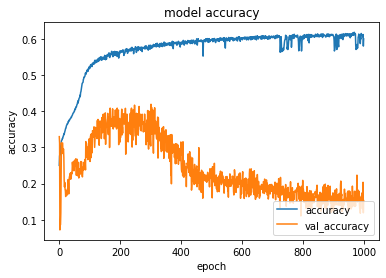

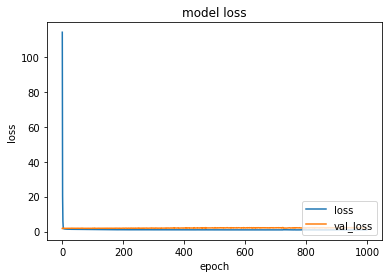

In [50]:
# 学習履歴をプロット
plot_history(history)
